In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

import bacco
import baccoemu

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import utils

%load_ext autoreload
%autoreload 2

Importing pyfftw first


2024-04-15 14:59:10.391341: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
npart = 512
box_size = 1000.0
param_names = ['omega_m', 'omega_baryon', 'h', 'n_s', 'sigma_8']

In [3]:
# initial quijote test data

# fn_pred = '/cosmos_storage/cosmosims/datashare/Quijote_data/Fiducial/Quijote/200/pred_pos_200.npy'
# pred_disp = np.load(fn_pred)

# fn_sim = f'/cosmos_storage/cosmosims/datashare/Quijote_data/Fiducial/Quijote/200/dis_200.npy'
# sim_disp = np.load(fn_sim)

# fn_lin = '/cosmos_storage/cosmosims/datashare/Quijote_data/Fiducial/ZA/200/den_200.npy'
# dens_lin = np.load(fn_lin)[0]

In [4]:
# Quijote LH test data

idx_LH_str = '0010'
dir_mocks = '/cosmos_storage/home/mpelle/Yin_data/Quijote'

fn_pred = f'{dir_mocks}/LH{idx_LH_str}/pred_pos_{idx_LH_str}.npy'
pred_disp = np.load(fn_pred)

fn_sim = f'{dir_mocks}/LH{idx_LH_str}/dis_{idx_LH_str}.npy'
sim_disp = np.load(fn_sim)

fn_lin = f'{dir_mocks}/LH{idx_LH_str}/lin_den_{idx_LH_str}.npy'
dens_lin = np.load(fn_lin)[0]

In [5]:
# copied from DataCreationPipeline.py

## Create regular grid and displace particles
print("Generating grid")
grid = bacco.visualization.uniform_grid(npix=npart, L=boxsize, ndim=3, bounds=False)

print("Adding predicted displacements")
pred_pos = bacco.scaler.add_displacement(None,
                                    pred_disp,
                                    box=boxsize,
                                    pos=grid.reshape(-1,3),
                                    vel=None,
                                    vel_factor=0,
                                    verbose=True)[0]

Generating grid


NameError: name 'boxsize' is not defined

In [ ]:
sim = None
sdm = False
ngrid1 = npart

In [204]:
# copied from DataCreationPipeline.py
   
## Start bias model class

k_nyq = np.pi * npart / boxsize
#damping_scale = 0.7 #k_nyq
interlacing = False

print("Setting up bias model")
bmodel = bacco.BiasModel(sim=sim, linear_delta=dens_lin, ngrid=npart, ngrid1=None, 
                            sdm=sdm, mode="dm",
                            BoxSize=boxsize,
                            npart_for_fake_sim=npart, damping_scale=damping_scale, 
                            bias_model='expansion', deposit_method="cic", 
                            use_displacement_of_nn=False, interlacing=interlacing, 
                            )

2024-04-09 17:00:25,910 bacco.BiasModel : Initialising Bias Model class ...


Setting up bias model


In [205]:

## Compute lagrangian fields
print("Computing lagrangian fields")
bias_fields = bmodel.bias_terms_lag()

2024-04-09 17:00:32,026 bacco.BiasModel : Computing delta_to_tidal_field with 8 threads...
2024-04-09 17:00:32,028 bacco.BiasModel : fttw plan
2024-04-09 17:00:32,029 bacco.BiasModel : Computing linear field ...
2024-04-09 17:00:32,030 bacco.BiasModel : Memory used: 32.466354176 Gigabytes
2024-04-09 17:00:32,033 bacco.BiasModel : fttw freqs
2024-04-09 17:00:32,034 bacco.BiasModel : tidk freqs


Computing lagrangian fields


2024-04-09 17:00:38,896 bacco.BiasModel : ifft
2024-04-09 17:01:21,695 bacco.BiasModel : Computing laplacian ...
2024-04-09 17:01:21,698 bacco.BiasModel : Memory used: 37.298921472 Gigabytes
2024-04-09 17:01:23,595 bacco.BiasModel : Computing bias terms in lagrangian coords ...
2024-04-09 17:01:23,597 bacco.BiasModel : Memory used: 37.834674176 Gigabytes
2024-04-09 17:01:23,846 bacco.BiasModel : Computing delta squared ...
2024-04-09 17:01:23,847 bacco.BiasModel : Memory used: 38.371364864 Gigabytes
2024-04-09 17:01:25,035 bacco.BiasModel : Computing tidal component G2 with the given tidal field
2024-04-09 17:01:25,036 bacco.BiasModel : Memory used: 38.908452864 Gigabytes


In [206]:
## Compute eulerian fields
print("Computing eulerian fields")
bias_terms_eul_pred=[]
for ii in range(0,len(bias_fields)):
    bias_terms_pred = bacco.statistics.compute_mesh(ngrid=npart, box=boxsize, pos=pred_pos, 
                                mass = (bias_fields[ii]).flatten(), deposit_method='cic', 
                                interlacing=interlacing)
    bias_terms_eul_pred.append(bias_terms_pred)
bias_terms_eul_pred = np.array(bias_terms_eul_pred)

Computing eulerian fields


2024-04-09 17:01:49,140 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-04-09 17:01:49,141 bacco.statistics : starting deposit 1
2024-04-09 17:01:51,542 bacco.statistics :  mesh done in 2.4 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=8, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (134217728 with mass)


2024-04-09 17:01:52,138 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-04-09 17:01:52,139 bacco.statistics : starting deposit 1
2024-04-09 17:01:54,542 bacco.statistics :  mesh done in 2.4 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=8, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (134217728 with mass)


2024-04-09 17:01:55,025 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-04-09 17:01:55,026 bacco.statistics : starting deposit 1
2024-04-09 17:01:57,327 bacco.statistics :  mesh done in 2.3 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=8, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (134217728 with mass)


2024-04-09 17:01:57,704 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-04-09 17:01:57,705 bacco.statistics : starting deposit 1


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=8, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb


2024-04-09 17:02:00,160 bacco.statistics :  mesh done in 2.46 s


bacco.mesh : binning of 134217728 particles (134217728 with mass)


2024-04-09 17:02:00,680 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-04-09 17:02:00,681 bacco.statistics : starting deposit 1
2024-04-09 17:02:03,108 bacco.statistics :  mesh done in 2.43 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=8, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (134217728 with mass)


Now with simulated (true):

In [168]:
# copied from DataCreationPipeline.py

## Create regular grid and displace particles
print("Generating grid")
grid = bacco.visualization.uniform_grid(npix=npart, L=boxsize, ndim=3, bounds=False)

print("Adding predicted displacements")
sim_pos = bacco.scaler.add_displacement(None,
                                    sim_disp,
                                    box=boxsize,
                                    pos=grid.reshape(-1,3),
                                    vel=None,
                                    vel_factor=0,
                                    verbose=True)[0]

Generating grid


2024-04-09 15:50:06,177 bacco.scaler : Adding displacement field with a vel-factor=0.000000


Adding predicted displacements
bacco.lss_scaler:  Adding LSS displacement: vel_factor=0.000000 mesh_dtype=4, use_vel=0, use_bias=0
bacco.lss_scaler:  Adding LSS displacement: looping over particles


In [169]:
print("Setting up bias model")
bmodel_sim = bacco.BiasModel(sim=sim, linear_delta=dens_lin, ngrid=npart, ngrid1=None, 
                            sdm=sdm, mode="dm",
                            BoxSize=boxsize,
                            npart_for_fake_sim=npart, damping_scale=damping_scale, 
                            bias_model='expansion', deposit_method="cic", 
                            use_displacement_of_nn=False, interlacing=interlacing, 
                            )

2024-04-09 15:50:10,458 bacco.BiasModel : Initialising Bias Model class ...


Setting up bias model


In [170]:

## Compute lagrangian fields
print("Computing lagrangian fields")
bias_fields_sim = bmodel_sim.bias_terms_lag()

2024-04-09 15:50:14,688 bacco.BiasModel : Computing delta_to_tidal_field with 8 threads...
2024-04-09 15:50:14,689 bacco.BiasModel : fttw plan
2024-04-09 15:50:14,689 bacco.BiasModel : Computing linear field ...
2024-04-09 15:50:14,691 bacco.BiasModel : Memory used: 27.098853376 Gigabytes
2024-04-09 15:50:14,695 bacco.BiasModel : fttw freqs
2024-04-09 15:50:14,696 bacco.BiasModel : tidk freqs


Computing lagrangian fields


2024-04-09 15:50:20,709 bacco.BiasModel : ifft
2024-04-09 15:50:57,114 bacco.BiasModel : Computing laplacian ...
2024-04-09 15:50:57,117 bacco.BiasModel : Memory used: 31.932325888 Gigabytes
2024-04-09 15:50:58,242 bacco.BiasModel : Computing bias terms in lagrangian coords ...
2024-04-09 15:50:58,243 bacco.BiasModel : Memory used: 32.4691968 Gigabytes
2024-04-09 15:50:58,391 bacco.BiasModel : Computing delta squared ...
2024-04-09 15:50:58,393 bacco.BiasModel : Memory used: 33.006067712 Gigabytes
2024-04-09 15:50:59,123 bacco.BiasModel : Computing tidal component G2 with the given tidal field
2024-04-09 15:50:59,129 bacco.BiasModel : Memory used: 33.542946816 Gigabytes


In [171]:
## Compute eulerian fields
print("Computing eulerian fields")
bias_terms_eul_sim=[]
for ii in range(0,len(bias_fields)):
    bias_terms_sim = bacco.statistics.compute_mesh(ngrid=npart, box=boxsize, pos=sim_pos, 
                                mass = (bias_fields[ii]).flatten(), deposit_method='cic', 
                                interlacing=interlacing)
    bias_terms_eul_sim.append(bias_terms_sim)
bias_terms_eul_sim = np.array(bias_terms_eul_sim)

Computing eulerian fields


2024-04-09 15:51:10,921 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-04-09 15:51:10,922 bacco.statistics : starting deposit 1
2024-04-09 15:51:13,155 bacco.statistics :  mesh done in 2.23 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=8, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (134217728 with mass)


2024-04-09 15:51:13,624 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-04-09 15:51:13,626 bacco.statistics : starting deposit 1
2024-04-09 15:51:15,876 bacco.statistics :  mesh done in 2.25 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=8, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (134217728 with mass)


2024-04-09 15:51:16,282 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-04-09 15:51:16,283 bacco.statistics : starting deposit 1
2024-04-09 15:51:18,511 bacco.statistics :  mesh done in 2.23 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=8, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (134217728 with mass)


2024-04-09 15:51:18,910 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-04-09 15:51:18,911 bacco.statistics : starting deposit 1


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=8, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb


2024-04-09 15:51:21,156 bacco.statistics :  mesh done in 2.25 s


bacco.mesh : binning of 134217728 particles (134217728 with mass)


2024-04-09 15:51:21,546 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-04-09 15:51:21,547 bacco.statistics : starting deposit 1
2024-04-09 15:51:23,775 bacco.statistics :  mesh done in 2.23 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=8, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (134217728 with mass)


### Compute p(k)

In [172]:
def get_tracer_field(bias_fields_eul, bias_vector):

    def _sum_bias_fields(fields, bias_vector):
        bias_vector_extended = np.concatenate(([1.0], bias_vector))
        return np.sum([fields[ii]*bias_vector_extended[ii] for ii in range(len(bias_vector))], axis=0)
    
    tracer_field_eul = _sum_bias_fields(bias_fields_eul, bias_vector)
    print(tracer_field_eul.shape)
    # normalize by 512 because that's the original ngrid size
    tracer_field_eul_norm512 = tracer_field_eul/512**3
    return tracer_field_eul_norm512

In [173]:
def compute_pk(tracer_field, cosmo, n_grid, n_threads=8):

    # param_vals = np.loadtxt(fn_params)
    # param_dict = dict(zip(param_names, param_vals))
    # cosmo = get_cosmo(param_dict)
    
    box_size = 1000.0

    k_min = 0.01
    k_max = 0.4
    n_bins = 30
    log_binning = True

    args_power = {'ngrid':n_grid,
                'box':box_size,
                'cosmology':cosmo,
                'interlacing':False,
                'kmin':k_min,
                'kmax':k_max,
                'nbins':n_bins,
                'correct_grid':True,
                'log_binning':log_binning,
                'deposit_method':'cic',
                'compute_correlation':False,
                'zspace':False,
                'compute_power2d':False}
    
    bacco.configuration.update({'number_of_threads': n_threads})

    # NOTE assumes tracer field is already normalized!
    pk = bacco.statistics.compute_crossspectrum_twogrids(
                        grid1=tracer_field,
                        grid2=tracer_field,
                        normalise_grid1=False,
                        normalise_grid2=False,
                        deconvolve_grid1=False,
                        deconvolve_grid2=False,
                        **args_power)
    
    return pk

In [174]:
a_Quijote = 1
Ob = 0.049
Om = 0.3175
hubble = 0.6711
ns = 0.9624
sigma8 = 0.834
cosmopars = dict(
        omega_cdm=Om-Ob,
        omega_baryon=Ob, 
        hubble=hubble, 
        ns=ns, 
        sigma8=sigma8,
        tau=0.0561,
        A_s=None,
        neutrino_mass=0.,
        w0=-1,
        wa=0,
        tag="cosmo_BOSS"
    )
    
    
cosmo_Quijote = bacco.Cosmology(**cosmopars)
cosmo_Quijote.set_expfactor(a_Quijote)

2024-04-09 15:51:30,310 bacco.cosmo :    initialization took 0.000 secs


In [175]:
bias_vector = [0., 0., 0., 0.]
tracer_field = get_tracer_field(bias_terms_eul_pred, bias_vector)


(1, 512, 512, 512)


In [176]:
n_grid = 512
pk_obj = compute_pk(tracer_field, cosmo_Quijote, n_grid)

2024-04-09 15:51:41,167 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False
2024-04-09 15:51:41,457 bacco.cosmo :    computed CAMB power spectrum at z=0.00 in 0.289 secs
2024-04-09 15:51:41,467 bacco.cosmo :    created Pk(z=0) tab from k 7.450454722857103e-05 to 100000.0 h/Mpc
2024-04-09 15:51:41,473 bacco.cosmo :    computed halofit at z=0.00 for 'cosmo_BOSS' in 0.003 secs


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 8; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=0 deconvolve_grid2=0
bacco.power : total mass 1 (grid1) 1 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.537875 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.284471 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000402 secs
bacco.power : Deallocating arrays


2024-04-09 15:51:47,061 bacco.statistics :  ...done in 5.89 s


In [177]:
kk = pk_obj['k']
gaussian_error_pk = pk_obj['pk_gaussian_error']

In [178]:
tracer_field_sim = get_tracer_field(bias_terms_eul_sim, bias_vector)


(1, 512, 512, 512)


In [179]:
pk_obj_sim = compute_pk(tracer_field_sim, cosmo_Quijote, n_grid)

2024-04-09 15:51:57,437 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 8; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=0 deconvolve_grid2=0
bacco.power : total mass 1 (grid1) 1 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.508468 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.293376 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000198 secs
bacco.power : Deallocating arrays


2024-04-09 15:52:02,285 bacco.statistics :  ...done in 4.85 s


### Emulators

In [6]:
emu_lbias, emu_bounds, emu_param_names = utils.load_emu()
emu_bounds_dict = dict(zip(emu_param_names, emu_bounds))


Loading l-bias lpt emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-04-15 15:00:41.594422: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_thread

L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.1.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.1.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Nonlinear l-bias emulator loaded in memory.
HIIII


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [7]:
emu_mpk_ext, emu_bounds_mpk_ext, emu_param_names_mpk_ext = utils.load_emu(emu_name='mpk_extended')
emu_bounds_dict_mpk_ext = dict(zip(emu_param_names_mpk_ext, emu_bounds_mpk_ext))

Loading sigma8 emulator...
HIIII
Sigma8 emulator loaded in memory.
Loading linear emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.4.0

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.3.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [8]:
param_names_2_emu_param_names = {'sigma_8': 'sigma8_cold',
                                 'omega_cold': 'omega_cold',
                                 'omega_baryon': 'omega_baryon',
                                 'h': 'hubble',
                                 'n_s': 'ns'}
emu_param_names = [param_names_2_emu_param_names[param_name] for param_name in param_names if param_name in param_names_2_emu_param_names]

cosmo_params = {
    'neutrino_mass' :  0.0,
    'w0'            : -1.0,
    'wa'            :  0.0,
    'expfactor'     :  1
}

In [ ]:
#cosmo_params_emu = utils.setup_cosmo_emu(cosmo='quijote')
fn_params = f'{dir_mocks}/LH{idx_LH_str}/param_{idx_LH_str}.txt'
param_vals = np.loadtxt(fn_params)
param_dict = dict(zip(param_names, param_vals))

for param_name in param_names:
    if param_name=='omega_m':
        # no neutrinos, so omega_cold = omega_m
        emu_param_name = 'omega_cold'
    else:
        emu_param_name = param_names_2_emu_param_names[param_name]
    cosmo_params[emu_param_name] = param_dict[param_name]
        
# _, pk_lbias, _ = emu_lbias.get_galaxy_real_pk(bias=bias_vector, k=kk, 
#                                                     **cosmo_params)
_, pk_emu, = emu_mpk_ext.get_nonlinear_pk(k=kk, cold=True,
                                                        **cosmo_params)

NameError: name 'kk' is not defined

### Plot

/tmp/ipykernel_456874/2914888938.py:29: RuntimeWarning: divide by zero encountered in divide
  ax1.plot(kk, (pk_m2m-pk_emu)/denom, ls='-', alpha=alpha, color=color_pk)
/tmp/ipykernel_456874/2914888938.py:30: RuntimeWarning: divide by zero encountered in divide
  ax1.plot(kk, (pk_obj_sim['pk']-pk_emu)/denom, ls='--', alpha=alpha, color=color_pk_sim)
/tmp/ipykernel_456874/2914888938.py:35: RuntimeWarning: divide by zero encountered in divide
  ax2.plot(kk, pk_emu/pk_m2m, ls='-', alpha=alpha, color=color_pk)
/tmp/ipykernel_456874/2914888938.py:36: RuntimeWarning: divide by zero encountered in divide
  ax2.plot(kk, pk_emu/pk_obj_sim['pk'], ls='--', alpha=alpha, color=color_pk_sim)


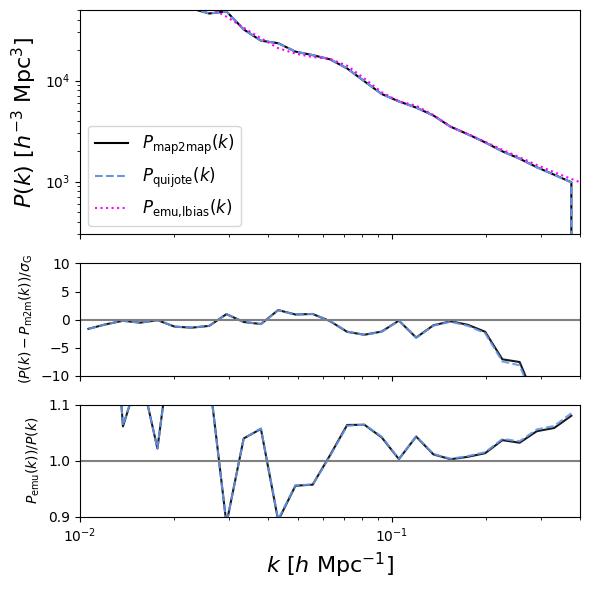

In [189]:
nrows, ncols = 3, 1
fig, axarr = plt.subplots(nrows, ncols, figsize=(6,6), sharex=True, height_ratios=[2,1,1])
plt.subplots_adjust(hspace=0.01)
ax, ax1, ax2 = axarr

color_pk, color_pk_cold, color_pk_tot = 'black', 'blue', 'purple', 
color_pk_emu, color_pk_lbias_public = 'magenta', 'salmon'
color_inlin = 'green'
color_pk_sim = 'cornflowerblue'

n_plot = 1


pk_m2m = pk_obj['pk']
ax.loglog(kk, pk_m2m, label=r'$P_\text{map2map}(k)$', color=color_pk)
ax.loglog(kk, pk_obj_sim['pk'], ls='--', label=r'$P_\text{quijote}(k)$', color=color_pk_sim)
# ax.loglog(k_input, pk_input, label=r'$P_\text{input,lin}(k)$', color=color_inlin, lw=4)
# ax.loglog(k, pk_lin_cold, label=r'$P_\text{emu,lin,cold}(k)$', color=color_pk_cold)
# ax.loglog(k, pk_lin_total, label=r'$P_\text{emu,lin,tot}(k)$', ls='--', color=color_pk_tot)
ax.loglog(kk, pk_emu, label=r'$P_\text{emu,lbias}(k)$', ls=':', color=color_pk_emu)
# ax.loglog(k, pk_lbias_public, label=r'$P_\text{emu,lbiaspub}(k)$', ls='-.', color=color_pk_lbias_public)

#ax.loglog(kk, Pk_lin[idx_LH], label=r'$P_\text{lin}(k)$')
#ax.loglog(kk, Pk_nl[idx_LH], label=r'$P_\text{nl}(k)$')

denom = gaussian_error_pk

alpha = 0.9
ax1.plot(kk, (pk_m2m-pk_emu)/denom, ls='-', alpha=alpha, color=color_pk)
ax1.plot(kk, (pk_obj_sim['pk']-pk_emu)/denom, ls='--', alpha=alpha, color=color_pk_sim)
# ax1.plot(k, (pk_lbias_public-pk_m2m)/denom, ls='-.', alpha=0.5, color=color_pk_lbias_public)

# actually compare to emu !

ax2.plot(kk, pk_emu/pk_m2m, ls='-', alpha=alpha, color=color_pk)
ax2.plot(kk, pk_emu/pk_obj_sim['pk'], ls='--', alpha=alpha, color=color_pk_sim)


# ax2.plot(k, (pk_lbias-pk_m2m)/pk_m2m, ls=':', alpha=0.5, color=color_pk_lbias)
# ax2.plot(k, (pk_obj_sim['pk']-pk_m2m)/pk_m2m, ls='-', alpha=0.5, color=color_pk_sim)

ax1.axhline(0.0, color='grey')
#ax2.axhline(0.0, color='grey')
ax2.axhline(1.0, color='grey')

ax2.set_xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=16)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=16)
ax1.set_ylabel(r'$(P(k)-P_\text{m2m}(k))/\sigma_\text{G}$')
#ax2.set_ylabel(r'$(P(k)-P_\text{map2map}(k))$'+'\n'+r'$/P_\text{map2map}(k)$')
ax2.set_ylabel(r'$P_\text{emu}(k))/P(k)$')
ax.set_xlim(1e-2, 0.4)
ax.set_ylim(3e2, 5e4)

ax1.set_ylim(-10, 10)
#ax2.set_ylim(-0.1, 0.1)
ax2.set_ylim(0.9, 1.1)

ax.legend(fontsize=12)

mpl.pyplot.tight_layout()
mpl.pyplot.show()

### Check single quijote

In [155]:
idx_LH_str = '0010'
dir_mocks = '/cosmos_storage/home/mpelle/Yin_data/Quijote'
dir_fields = '../data/quijote_LH'
tag_pk = '_b0000'
fn_fields_sim = f'{dir_fields}/LH{idx_LH_str}/Eulerian_fields_sim_{idx_LH_str}.npy'

dir_pks_sim = f'../data/pks_quijote_LH/pks_sim{tag_pk}'
dir_pks_pred = f'../data/pks_quijote_LH/pks_pred{tag_pk}'

fn_bias_vector = f'{dir_pks_sim}/bias_params.txt' #same for sim and pred
bias_params = np.loadtxt(fn_bias_vector)

In [156]:
bias_terms_eul_sim = np.load(fn_fields_sim)

In [157]:
tracer_field_sim = get_tracer_field(bias_terms_eul_sim, bias_vector)

(1, 512, 512, 512)


In [160]:
n_grid = 512
pk_obj_sim = compute_pk(tracer_field_sim, cosmo_Quijote, n_grid)
print(pk_obj_sim['pk'])

2024-04-09 15:42:32,056 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 8; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=0 deconvolve_grid2=0
bacco.power : total mass 2.23517e-08 (grid1) 2.23517e-08 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.543300 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.287129 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000165 secs
bacco.power : Deallocating arrays


2024-04-09 15:42:37,913 bacco.statistics :  ...done in 5.86 s


[4.95530787e-07 4.94205677e-07 4.97421635e-07 4.99759756e-07
 5.00982765e-07 4.99848104e-07 5.00360074e-07 5.03177745e-07
 5.00232067e-07 4.95367786e-07 4.99660536e-07 4.98800951e-07
 4.97393066e-07 4.96078171e-07 4.93706549e-07 4.91435119e-07
 4.88514719e-07 4.85912618e-07 4.77589408e-07 4.71135622e-07
 4.66582050e-07 4.54257678e-07 4.38096149e-07 4.26537975e-07
 4.02154889e-07 3.82314895e-07 3.51740431e-07 3.20525370e-07
 2.84319655e-07 0.00000000e+00]


In [159]:
pk_obj_sim['pk']

array([4.95530787e-07, 4.94205677e-07, 4.97421635e-07, 4.99759756e-07,
       5.00982765e-07, 4.99848104e-07, 5.00360074e-07, 5.03177745e-07,
       5.00232067e-07, 4.95367786e-07, 4.99660536e-07, 4.98800951e-07,
       4.97393066e-07, 4.96078171e-07, 4.93706549e-07, 4.91435119e-07,
       4.88514719e-07, 4.85912618e-07, 4.77589408e-07, 4.71135622e-07,
       4.66582050e-07, 4.54257678e-07, 4.38096149e-07, 4.26537975e-07,
       4.02154889e-07, 3.82314895e-07, 3.51740431e-07, 3.20525370e-07,
       2.84319655e-07, 0.00000000e+00])

### Matter p(k) emu

In [9]:
emu_mpk_ext, emu_bounds_mpk_ext, emu_param_names_mpk_ext = utils.load_emu(emu_name='mpk_extended')

Loading sigma8 emulator...
HIIII
Sigma8 emulator loaded in memory.
Loading linear emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.4.0

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.3.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when u

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [10]:
emu_bounds_dict_mpk_ext = dict(zip(emu_param_names_mpk_ext, emu_bounds_mpk_ext))


In [11]:
emu_bounds_dict_mpk_ext

{'omega_cold': array([0.15, 0.47]),
 'sigma8_cold': array([0.4 , 1.15]),
 'omega_baryon': array([0.03, 0.07]),
 'ns': array([0.83, 1.1 ]),
 'hubble': array([0.5, 0.9]),
 'neutrino_mass': array([0. , 0.4]),
 'w0': array([-1.4, -0.6]),
 'wa': array([-0.5,  0.5]),
 'expfactor': array([0.275, 1.1  ])}

### Compare many LHs - quijote vs map2map

In [12]:
ngrid = 512
BoxSize = 1000.

idxs_LH = np.array([10,29,37,40,70,85,127,158,165,184,208,220,240,254,267,274,293,305,336,374,375,388,433,444,
                      464,502,534,542,574,598,605,628,652,663,676,700,702,721,737,762,809,822,825,837,853,864,882,
                      899,901,911,939,948,950,951,964,976,977,1016,1022,1041,1050,1060,1082,1091,1103,1114,1147,
                      1157,1173,1175,1219,1222,1299,1309,1314,1317,1331,1365,1372,1378,1391,1397,1418,1444,1459,
                      1510,1512,1513,1515,1517,1533,1553,1567,1568,1599,1622,1642,1657,1659,1667])

In [13]:
tag_pk = '_b0000'
dir_pks_sim = f'../data/pks_quijote_LH/pks_sim{tag_pk}'
dir_pks_pred = f'../data/pks_quijote_LH/pks_pred{tag_pk}'
dir_mocks = '/cosmos_storage/home/mpelle/Yin_data/Quijote' #need for params

fn_bias_vector = f'{dir_pks_sim}/bias_params.txt' #same for sim and pred
bias_params = np.loadtxt(fn_bias_vector)
param_names = ['omega_m', 'omega_baryon', 'h', 'n_s', 'sigma_8']

In [14]:
idxs_LH_inbounds = []
theta = []

for i, idx_LH in enumerate(idxs_LH):    
#for i, idx_LH in enumerate(idxs_LH[:48]):    

    idx_LH_str = f'{idx_LH:04}' 

    fn_params = f'{dir_mocks}/LH{idx_LH_str}/param_{idx_LH_str}.txt'
    param_vals = np.loadtxt(fn_params)
    param_dict = dict(zip(param_names, param_vals))
    out_of_bounds = False # til we check, below

    if i % 100 == 0:
        print(i)
    for param_name in param_names:
        if param_name=='omega_m':
            # no neutrinos, so omega_cold = omega_m
            emu_param_name = 'omega_cold'
        else:
            emu_param_name = param_names_2_emu_param_names[param_name]
        cosmo_params[emu_param_name] = param_dict[param_name]
        
        # print(param_name, param_dict[param_name])
        # print(emu_param_name, emu_bounds_dict[emu_param_name])
        
        # check in bounds
        if (param_dict[param_name] < emu_bounds_dict_mpk_ext[emu_param_name][0]) or \
           (param_dict[param_name] > emu_bounds_dict_mpk_ext[emu_param_name][1]):
            #print(f"params for {idx_LH} OOB!")    
            out_of_bounds = True
            break
    
    if out_of_bounds:
        continue
    
    idxs_LH_inbounds.append(idx_LH)
    theta.append(param_vals)

theta = np.array(theta)

print(len(idxs_LH_inbounds))

0
59


In [15]:
pks_sim = []
pks_pred = []
for idx_LH in idxs_LH_inbounds:
    idx_LH_str = f'{idx_LH:04}' 
    
    fn_pk_sim = f'{dir_pks_sim}/pk_{idx_LH_str}.npy'
    pks_sim.append( np.load(fn_pk_sim, allow_pickle=True).item() )
    
    fn_pk_pred = f'{dir_pks_pred}/pk_{idx_LH_str}.npy'
    pks_pred.append( np.load(fn_pk_pred, allow_pickle=True).item() )



In [16]:
Pk_sim = np.array([pk['pk'] for pk in pks_sim])
Pk_pred = np.array([pk['pk'] for pk in pks_pred])
gaussian_error_pk_sim = np.array([pk['pk_gaussian_error'] for pk in pks_sim])
gaussian_error_pk_pred = np.array([pk['pk_gaussian_error'] for pk in pks_pred])
k = pks_sim[0]['k']

In [17]:
Pk_emu = []
for i, idx_LH in enumerate(idxs_LH_inbounds):
    param_dict = dict(zip(param_names, theta[i]))
    for param_name in param_names:
        if param_name=='omega_m':
            # no neutrinos, so omega_cold = omega_m
            emu_param_name = 'omega_cold'
        else:
            emu_param_name = param_names_2_emu_param_names[param_name]
        cosmo_params[emu_param_name] = param_dict[param_name]
    
    #_, pk_model_unscaled, _ = emu_lbias.get_galaxy_real_pk(bias=bias_params, k=k, 
    #                                                       **cosmo_params)
    _, pk_model_unscaled, = emu_mpk_ext.get_nonlinear_pk(k=k, cold=True,
                                                           **cosmo_params)
    Pk_emu.append(pk_model_unscaled)
    
Pk_emu = np.array(Pk_emu)

In [18]:
param_names_2_emu_param_names = {'sigma_8': 'sigma8_cold',
                                 'omega_cold': 'omega_cold',
                                 'omega_baryon': 'omega_baryon',
                                 'h': 'hubble',
                                 'n_s': 'ns'}
emu_param_names = [param_names_2_emu_param_names[param_name] for param_name in param_names if param_name in param_names_2_emu_param_names]

In [19]:
cosmo_params = {
    'neutrino_mass' :  0.0,
    'w0'            : -1.0,
    'wa'            :  0.0,
    'expfactor'     :  1
}

In [20]:
print(np.min(theta, axis=0))
print(np.max(theta, axis=0))
# checks out with order ['omega_m', 'omega_baryon', 'h', 'n_s', 'sigma_8']!

[0.1505  0.03335 0.5147  0.8309  0.6229 ]
[0.4679  0.06729 0.8877  1.0951  0.9793 ]


/tmp/ipykernel_35656/3861931881.py:45: RuntimeWarning: divide by zero encountered in divide
  axarr[1].plot(k, (pk_model_unscaled-Pk_sim[i])/gaussian_error_pk_sim[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
/tmp/ipykernel_35656/3861931881.py:46: RuntimeWarning: divide by zero encountered in divide
  axarr[2].plot(k, (pk_model_unscaled-Pk_pred[i])/gaussian_error_pk_sim[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
/tmp/ipykernel_35656/3861931881.py:47: RuntimeWarning: invalid value encountered in divide
  axarr[3].plot(k, (Pk_pred[i]-Pk_sim[i])/gaussian_error_pk_sim[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
/tmp/ipykernel_35656/3861931881.py:48: RuntimeWarning: invalid value encountered in divide
  axarr[4].plot(k, (Pk_pred[i]/Pk_sim[i]), ls='-', alpha=0.5, color=colors[i], lw=lw)
/tmp/ipykernel_35656/3861931881.py:66: RuntimeWarning: divide by zero encountered in divide
  diff_Pksim_overG = diff_Pksim/gaussian_error_pk_sim
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-p

['emulated at true $\\theta$', 'Quijote simulation', 'map2map prediction']
['median', '16-84 percentile']
['emulated at true $\\theta$', 'Quijote simulation', 'map2map prediction']
['median', '16-84 percentile']


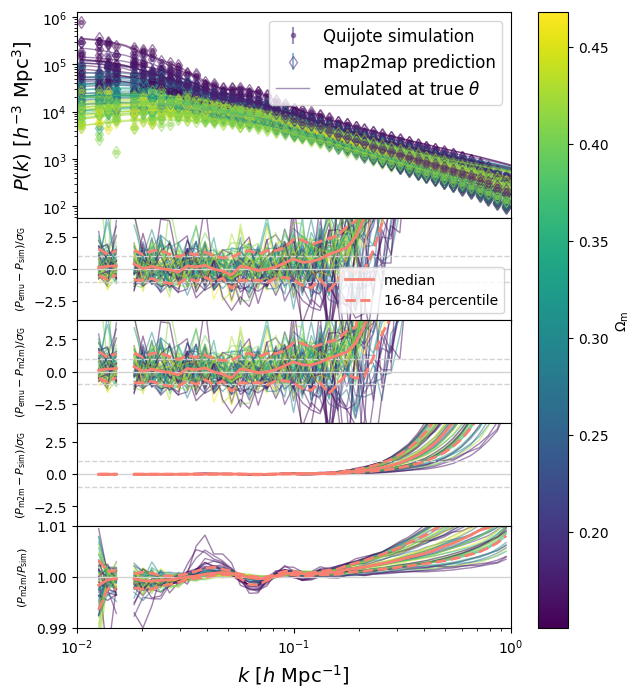

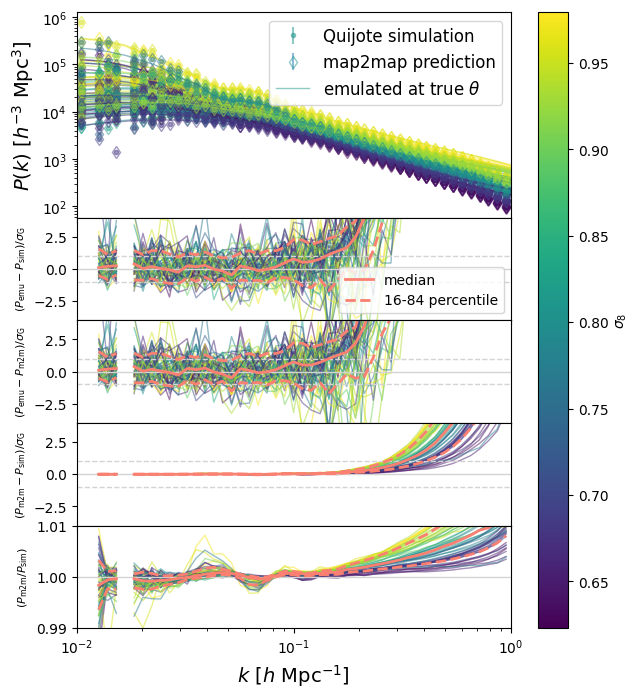

In [26]:
param_names_compare = ['omega_m', 'sigma_8']

for param_name_compare in param_names_compare:
    idx_param = param_names.index(param_name_compare)
    param_vals = np.array([theta[i][idx_param] for i in range(theta.shape[0])])

    normalizer = mpl.colors.Normalize(vmin=np.min(param_vals), vmax=np.max(param_vals))
    sm = mpl.cm.ScalarMappable(norm=normalizer, cmap=mpl.cm.viridis)#.to_rgba(cvals)
    colors = sm.to_rgba(param_vals)
        

    nrows, ncols = 5, 1
    fig, axarr = plt.subplots(nrows, ncols, figsize=(7,8), sharex=True, height_ratios=[2,1,1,1,1])
    plt.subplots_adjust(hspace=0)
        
    # a few examples
    #colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    #print(colors)
    lw = 1
    show_error_all = False
    first = True
    for i, idx_LH in enumerate(idxs_LH_inbounds):
    
        pk_model_unscaled = Pk_emu[i]
        
        label_true, label_emu, label_stdev = None, None, None
        if first:
            label_true = 'Quijote simulation'
            label_emu = r'emulated at true $\theta$'
            label_stdev = r'$0.2*\sigma_\text{stdev}(P_\text{train}(k))$'
            
        if first or show_error_all:
            axarr[0].errorbar(k, Pk_sim[i], yerr=gaussian_error_pk_sim[i], 
                            ls='None', marker='o', markersize=3, alpha=0.5, label=label_true, color=colors[i])
            axarr[0].errorbar(k, Pk_pred[i], yerr=gaussian_error_pk_sim[i], ls='None', marker='d', markersize=6, alpha=0.5, 
                            label='map2map prediction', 
                        markerfacecolor='None', markeredgecolor=colors[i])
        else:
            axarr[0].plot(k, Pk_sim[i], ls='None', marker='o', markersize=3, alpha=0.5, color=colors[i])
            axarr[0].plot(k, Pk_pred[i], ls='None', marker='d', markersize=6, alpha=0.5,
                        markerfacecolor='None', markeredgecolor=colors[i])
        
        axarr[0].plot(k, pk_model_unscaled, ls='-', alpha=0.5, label=label_emu, color=colors[i], lw=lw)

        axarr[1].plot(k, (pk_model_unscaled-Pk_sim[i])/gaussian_error_pk_sim[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
        axarr[2].plot(k, (pk_model_unscaled-Pk_pred[i])/gaussian_error_pk_sim[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
        axarr[3].plot(k, (Pk_pred[i]-Pk_sim[i])/gaussian_error_pk_sim[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
        axarr[4].plot(k, (Pk_pred[i]/Pk_sim[i]), ls='-', alpha=0.5, color=colors[i], lw=lw)
            
        first = False
        
    axarr[1].axhline(0, color='lightgrey', lw=1)
    axarr[2].axhline(0, color='lightgrey', lw=1)
    axarr[3].axhline(0, color='lightgrey', lw=1)
    axarr[4].axhline(1.0, color='lightgrey', lw=1)

    ls_1sig='--'
    axarr[1].axhline(-1, color='lightgrey', lw=1, ls=ls_1sig)
    axarr[1].axhline(1, color='lightgrey', lw=1, ls=ls_1sig)
    axarr[2].axhline(-1, color='lightgrey', lw=1, ls=ls_1sig)
    axarr[2].axhline(1, color='lightgrey', lw=1, ls=ls_1sig)
    axarr[3].axhline(-1, color='lightgrey', lw=1, ls=ls_1sig)
    axarr[3].axhline(1, color='lightgrey', lw=1, ls=ls_1sig)

    diff_Pksim = Pk_emu - Pk_sim
    diff_Pksim_overPk = diff_Pksim/gaussian_error_pk_sim
    diff_Pksim_overG_16 = np.percentile(diff_Pksim_overG, 16, axis=0)
    diff_Pksim_overG_84 = np.percentile(diff_Pksim_overG, 84, axis=0)
    diff_Pksim_overG_med = np.median(diff_Pksim_overG, axis=0)

    diff_Pkpred = Pk_emu - Pk_pred
    diff_Pkpred_overG = diff_Pkpred/gaussian_error_pk_sim
    diff_Pkpred_overG_16 = np.percentile(diff_Pkpred_overG, 16, axis=0)
    diff_Pkpred_overG_84 = np.percentile(diff_Pkpred_overG, 84, axis=0)
    diff_Pkpred_overG_med = np.median(diff_Pkpred_overG, axis=0)

    diff = Pk_pred - Pk_sim
    diff_overG = diff/gaussian_error_pk_sim
    diff_overG_16 = np.percentile(diff_overG, 16, axis=0)
    diff_overG_84 = np.percentile(diff_overG, 84, axis=0)
    diff_overG_med = np.median(diff_overG, axis=0)

    ratio = Pk_pred/Pk_sim
    ratio_16 = np.percentile(ratio, 16, axis=0)
    ratio_84 = np.percentile(ratio, 84, axis=0)
    ratio_med = np.median(ratio, axis=0)

    alpha_16_84 = 0.5
    axarr[1].plot(k, diff_Pksim_overG_med, color='salmon', lw=2, label='median')
    axarr[1].plot(k, diff_Pksim_overG_16, color='salmon', lw=2, ls='--', label='16-84 percentile')
    axarr[1].plot(k, diff_Pksim_overG_84, color='salmon', lw=2, ls='--')

    axarr[2].plot(k, diff_Pkpred_overG_med, color='salmon', lw=2)
    axarr[2].plot(k, diff_Pkpred_overG_16, color='salmon', lw=2, ls='--')
    axarr[2].plot(k, diff_Pkpred_overG_84, color='salmon', lw=2, ls='--')

    axarr[3].plot(k, diff_overG_med, color='salmon', lw=2)
    axarr[3].plot(k, diff_overG_16, color='salmon', lw=2, ls='--')
    axarr[3].plot(k, diff_overG_84, color='salmon', lw=2, ls='--')

    axarr[4].plot(k, ratio_med, color='salmon', lw=2)
    axarr[4].plot(k, ratio_16, color='salmon', lw=2, ls='--')
    axarr[4].plot(k, ratio_84, color='salmon', lw=2, ls='--')


    # plot settings
    plt.xscale('log')
    axarr[0].set_yscale('log')
        
    plt.xlim(1e-2, 1)
    #axarr[0].set_ylim(1e3, 5e5)
    #axarr[0].set_ylim(1e2, 2e5)

    axarr[1].set_ylim(-4, 4)
    axarr[2].set_ylim(-4, 4)
    axarr[3].set_ylim(-4, 4)
    axarr[4].set_ylim(0.99, 1.01)
        
    handles, labels = axarr[0].get_legend_handles_labels()
    print(labels)

    if len(handles)>1:
        #order = [1,0,2]
        order = [1,2,0]
        #order = [1,0]
        axarr[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=12)
    # axarr[0].legend(fontsize=12)
    handles, labels = axarr[1].get_legend_handles_labels()
    print(labels)
    axarr[1].legend(fontsize=10)

    plt.xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=14)
    axarr[0].set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=14)    
    fontsize_errs = 8
    axarr[1].set_ylabel(r'$(P_\text{emu}-P_\text{sim})/\sigma_\text{G}$', fontsize=fontsize_errs)
    axarr[2].set_ylabel(r'$(P_\text{emu}-P_\text{m2m})/\sigma_\text{G}$', fontsize=fontsize_errs)
    axarr[3].set_ylabel(r'$(P_\text{m2m}-P_\text{sim})/\sigma_\text{G}$', fontsize=fontsize_errs)
    axarr[4].set_ylabel(r'$(P_\text{m2m}/P_\text{sim})$', fontsize=fontsize_errs)

    cbar = plt.colorbar(sm, ax=axarr.ravel().tolist())
    cbar.set_label(utils.param_label_dict[param_name_compare])

/tmp/ipykernel_211621/2007368632.py:12: RuntimeWarning: divide by zero encountered in divide
  diff_Pksim_overPk = diff_Pksim/Pk_sim
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/tmp/ipykernel_211621/2007368632.py:18: RuntimeWarning: divide by zero encountered in divide
  diff_Pkpred_overPk = diff_Pkpred/Pk_pred
/tmp/ipykernel_211621/2007368632.py:24: RuntimeWarning: invalid value encountered in divide
  diff_overPk = diff/Pk_sim


['emulated at true $\\theta$', 'Quijote simulation', 'map2map prediction']
['median', '16-84 percentile']


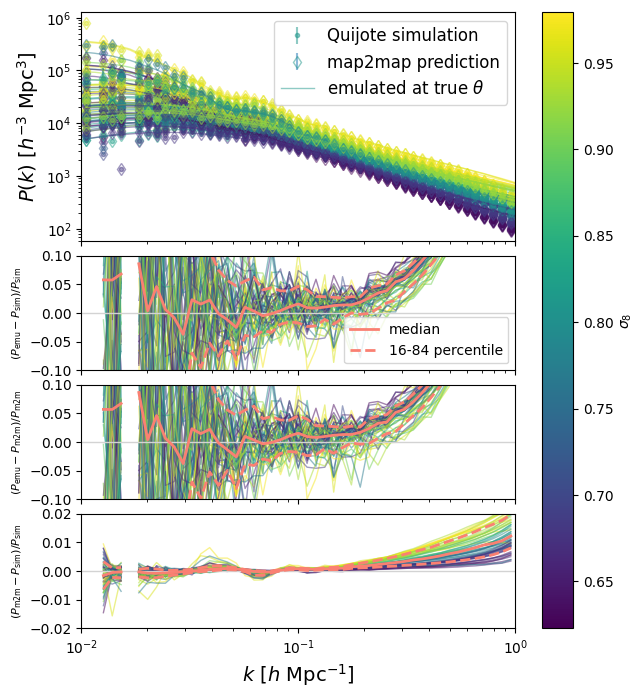

In [34]:
param_names_compare = ['sigma_8']

for param_name_compare in param_names_compare:
    idx_param = param_names.index(param_name_compare)
    param_vals = np.array([theta[i][idx_param] for i in range(theta.shape[0])])

    normalizer = mpl.colors.Normalize(vmin=np.min(param_vals), vmax=np.max(param_vals))
    sm = mpl.cm.ScalarMappable(norm=normalizer, cmap=mpl.cm.viridis)#.to_rgba(cvals)
    colors = sm.to_rgba(param_vals)
      
    diff_Pksim = Pk_emu - Pk_sim
    diff_Pksim_overPk = diff_Pksim/Pk_sim
    diff_Pksim_overPk_16 = np.percentile(diff_Pksim_overPk, 16, axis=0)
    diff_Pksim_overPk_84 = np.percentile(diff_Pksim_overPk, 84, axis=0)
    diff_Pksim_overPk_med = np.median(diff_Pksim_overPk, axis=0)

    diff_Pkpred = Pk_emu - Pk_pred
    diff_Pkpred_overPk = diff_Pkpred/Pk_pred
    diff_Pkpred_overPk_16 = np.percentile(diff_Pkpred_overPk, 16, axis=0)
    diff_Pkpred_overPk_84 = np.percentile(diff_Pkpred_overPk, 84, axis=0)
    diff_Pkpred_overPk_med = np.median(diff_Pkpred_overPk, axis=0)

    diff = Pk_pred - Pk_sim
    diff_overPk = diff/Pk_sim
    diff_overPk_16 = np.percentile(diff_overPk, 16, axis=0)
    diff_overPk_84 = np.percentile(diff_overPk, 84, axis=0)
    diff_overPk_med = np.median(diff_overPk, axis=0)

    nrows, ncols = 4, 1
    fig, axarr = plt.subplots(nrows, ncols, figsize=(7,8), sharex=True, height_ratios=[2,1,1,1])
    plt.subplots_adjust(hspace=0.1)
        
    # a few examples
    #colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    #print(colors)
    lw = 1
    show_error_all = False
    first = True
    for i, idx_LH in enumerate(idxs_LH_inbounds):
    
        pk_model_unscaled = Pk_emu[i]
        
        label_true, label_emu, label_stdev = None, None, None
        if first:
            label_true = 'Quijote simulation'
            label_emu = r'emulated at true $\theta$'
            label_stdev = r'$0.2*\sigma_\text{stdev}(P_\text{train}(k))$'
            
        if first or show_error_all:
            axarr[0].errorbar(k, Pk_sim[i], yerr=gaussian_error_pk_sim[i], 
                            ls='None', marker='o', markersize=3, alpha=0.5, label=label_true, color=colors[i])
            axarr[0].errorbar(k, Pk_pred[i], yerr=gaussian_error_pk_sim[i], ls='None', marker='d', markersize=6, alpha=0.5, 
                            label='map2map prediction', 
                        markerfacecolor='None', markeredgecolor=colors[i])
        else:
            axarr[0].plot(k, Pk_sim[i], ls='None', marker='o', markersize=3, alpha=0.5, color=colors[i])
            axarr[0].plot(k, Pk_pred[i], ls='None', marker='d', markersize=6, alpha=0.5,
                        markerfacecolor='None', markeredgecolor=colors[i])
        
        axarr[0].plot(k, pk_model_unscaled, ls='-', alpha=0.5, label=label_emu, color=colors[i], lw=lw)

        axarr[1].plot(k, diff_Pksim_overPk[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
        axarr[2].plot(k, diff_Pkpred_overPk[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
        axarr[3].plot(k, diff_overPk[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
            
        first = False
        
    axarr[1].axhline(0, color='lightgrey', lw=1)
    axarr[2].axhline(0, color='lightgrey', lw=1)
    axarr[3].axhline(0, color='lightgrey', lw=1)

    ls_1sig='--'
    axarr[1].axhline(-1, color='lightgrey', lw=1, ls=ls_1sig)
    axarr[1].axhline(1, color='lightgrey', lw=1, ls=ls_1sig)
    axarr[2].axhline(-1, color='lightgrey', lw=1, ls=ls_1sig)
    axarr[2].axhline(1, color='lightgrey', lw=1, ls=ls_1sig)
    axarr[3].axhline(-1, color='lightgrey', lw=1, ls=ls_1sig)
    axarr[3].axhline(1, color='lightgrey', lw=1, ls=ls_1sig)


    alpha_16_84 = 0.5
    axarr[1].plot(k, diff_Pksim_overPk_med, color='salmon', lw=2, label='median')
    axarr[1].plot(k, diff_Pksim_overPk_16, color='salmon', lw=2, ls='--', label='16-84 percentile')
    axarr[1].plot(k, diff_Pksim_overPk_84, color='salmon', lw=2, ls='--')

    axarr[2].plot(k, diff_Pkpred_overPk_med, color='salmon', lw=2)
    axarr[2].plot(k, diff_Pkpred_overPk_16, color='salmon', lw=2, ls='--')
    axarr[2].plot(k, diff_Pkpred_overPk_84, color='salmon', lw=2, ls='--')

    axarr[3].plot(k, diff_overPk_med, color='salmon', lw=2)
    axarr[3].plot(k, diff_overPk_16, color='salmon', lw=2, ls='--')
    axarr[3].plot(k, diff_overPk_84, color='salmon', lw=2, ls='--')

    # plot settings
    plt.xscale('log')
    axarr[0].set_yscale('log')
        
    plt.xlim(1e-2, 1)
    #axarr[0].set_ylim(1e3, 5e5)
    #axarr[0].set_ylim(1e2, 2e5)

    axarr[1].set_ylim(-0.1, 0.1)
    axarr[2].set_ylim(-0.1, 0.1)
    axarr[3].set_ylim(-0.02, 0.02)
        
    handles, labels = axarr[0].get_legend_handles_labels()
    print(labels)

    if len(handles)>1:
        #order = [1,0,2]
        order = [1,2,0]
        #order = [1,0]
        axarr[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=12)
    # axarr[0].legend(fontsize=12)
    handles, labels = axarr[1].get_legend_handles_labels()
    print(labels)
    axarr[1].legend(fontsize=10)

    plt.xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=14)
    axarr[0].set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=14)    
    fontsize_errs = 8
    axarr[1].set_ylabel(r'$(P_\text{emu}-P_\text{sim})/P_\text{sim}$', fontsize=fontsize_errs)
    axarr[2].set_ylabel(r'$(P_\text{emu}-P_\text{m2m})/P_\text{m2m}$', fontsize=fontsize_errs)
    axarr[3].set_ylabel(r'$(P_\text{m2m}-P_\text{sim})/P_\text{sim}$', fontsize=fontsize_errs)

    cbar = plt.colorbar(sm, ax=axarr.ravel().tolist())
    cbar.set_label(utils.param_label_dict[param_name_compare])

/tmp/ipykernel_211621/1241004147.py:50: RuntimeWarning: invalid value encountered in divide
  axarr[1].plot(k, (Pk_pred[i]-Pk_sim[i])/gaussian_error_pk_pred[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
/tmp/ipykernel_211621/1241004147.py:51: RuntimeWarning: invalid value encountered in divide
  axarr[2].plot(k, (Pk_pred[i]-Pk_sim[i])/Pk_sim[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
/tmp/ipykernel_211621/1241004147.py:52: RuntimeWarning: invalid value encountered in divide
  axarr[3].plot(k, (Tk_pred[i]-Tk_sim[i])/Tk_sim[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
/tmp/ipykernel_211621/1241004147.py:70: RuntimeWarning: invalid value encountered in divide
  diff_overG = diff/gaussian_error_pk_sim
/tmp/ipykernel_211621/1241004147.py:75: RuntimeWarning: invalid value encountered in divide
  diff_overPk = diff/Pk_sim
/tmp/ipykernel_211621/1241004147.py:81: RuntimeWarning: invalid value encountered in divide
  diffTk_overTk = diffTk/Tk_sim


['Quijote simulation', 'map2map prediction']
['median', '16-84 percentile']


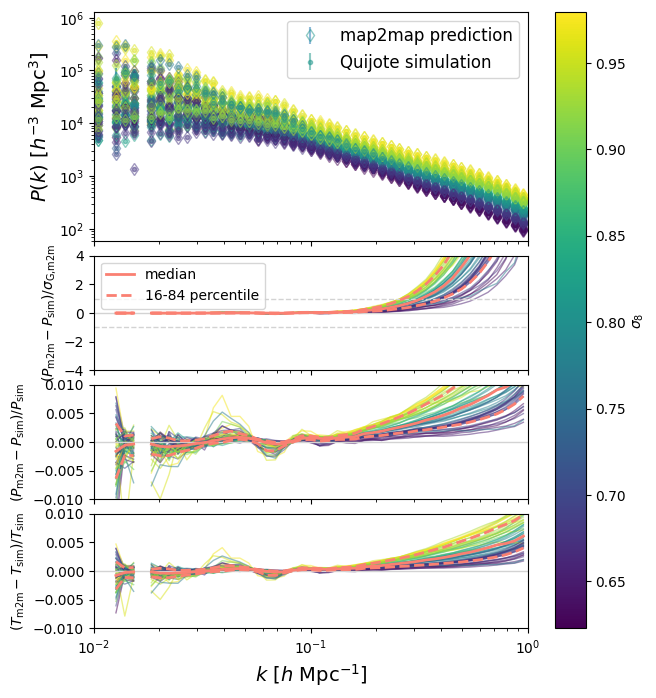

In [29]:
param_names_compare = ['sigma_8']

Tk_sim = np.sqrt(Pk_sim)
Tk_pred = np.sqrt(Pk_pred)

for param_name_compare in param_names_compare:
    idx_param = param_names.index(param_name_compare)
    param_vals = np.array([theta[i][idx_param] for i in range(theta.shape[0])])

    normalizer = mpl.colors.Normalize(vmin=np.min(param_vals), vmax=np.max(param_vals))
    sm = mpl.cm.ScalarMappable(norm=normalizer, cmap=mpl.cm.viridis)#.to_rgba(cvals)
    colors = sm.to_rgba(param_vals)
        

    nrows, ncols = 4, 1
    fig, axarr = plt.subplots(nrows, ncols, figsize=(7,8), sharex=True, height_ratios=[2,1,1,1])
    plt.subplots_adjust(hspace=0.1)
        
    # a few examples
    #colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    #print(colors)
    lw = 1
    show_error_all = False
    first = True
    for i, idx_LH in enumerate(idxs_LH_inbounds):
    
        pk_model_unscaled = Pk_emu[i]
        
        label_true, label_emu, label_stdev = None, None, None
        if first:
            label_true = 'Quijote simulation'
            label_emu = r'emulated at true $\theta$'
            label_stdev = r'$0.2*\sigma_\text{stdev}(P_\text{train}(k))$'
            
        if first or show_error_all:
            axarr[0].errorbar(k, Pk_sim[i], yerr=gaussian_error_pk_sim[i], 
                            ls='None', marker='o', markersize=3, alpha=0.5, label=label_true, color=colors[i])
            axarr[0].errorbar(k, Pk_pred[i], yerr=gaussian_error_pk_sim[i], ls='None', marker='d', markersize=6, alpha=0.5, 
                            label='map2map prediction', 
                        markerfacecolor='None', markeredgecolor=colors[i])
        else:
            axarr[0].plot(k, Pk_sim[i], ls='None', marker='o', markersize=3, alpha=0.5, color=colors[i])
            axarr[0].plot(k, Pk_pred[i], ls='None', marker='d', markersize=6, alpha=0.5,
                        markerfacecolor='None', markeredgecolor=colors[i])
        
        #axarr[0].plot(k, pk_model_unscaled, ls='-', alpha=0.5, label=label_emu, color=colors[i], lw=lw)

        #axarr[1].plot(k, (pk_model_unscaled-Pk_sim[i])/gaussian_error_pk_sim[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
        #axarr[2].plot(k, (pk_model_unscaled-Pk_pred[i])/gaussian_error_pk_sim[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
        axarr[1].plot(k, (Pk_pred[i]-Pk_sim[i])/gaussian_error_pk_pred[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
        axarr[2].plot(k, (Pk_pred[i]-Pk_sim[i])/Pk_sim[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
        axarr[3].plot(k, (Tk_pred[i]-Tk_sim[i])/Tk_sim[i], ls='-', alpha=0.5, color=colors[i], lw=lw)
            
        first = False
        
    axarr[1].axhline(0, color='lightgrey', lw=1)
    axarr[2].axhline(0, color='lightgrey', lw=1)
    axarr[3].axhline(0, color='lightgrey', lw=1)
    # axarr[4].axhline(1.0, color='lightgrey', lw=1)

    ls_1sig='--'
    axarr[1].axhline(-1, color='lightgrey', lw=1, ls=ls_1sig)
    axarr[1].axhline(1, color='lightgrey', lw=1, ls=ls_1sig)
    axarr[2].axhline(-1, color='lightgrey', lw=1, ls=ls_1sig)
    axarr[2].axhline(1, color='lightgrey', lw=1, ls=ls_1sig)
    axarr[3].axhline(-1, color='lightgrey', lw=1, ls=ls_1sig)
    axarr[3].axhline(1, color='lightgrey', lw=1, ls=ls_1sig)

    diff = Pk_pred - Pk_sim
    diff_overG = diff/gaussian_error_pk_sim
    diff_overG_16 = np.percentile(diff_overG, 16, axis=0)
    diff_overG_84 = np.percentile(diff_overG, 84, axis=0)
    diff_overG_med = np.median(diff_overG, axis=0)

    diff_overPk = diff/Pk_sim
    diff_overPk_16 = np.percentile(diff_overPk, 16, axis=0)
    diff_overPk_84 = np.percentile(diff_overPk, 84, axis=0)
    diff_overPk_med = np.median(diff_overPk, axis=0)

    diffTk = Tk_pred - Tk_sim
    diffTk_overTk = diffTk/Tk_sim
    diffTk_overTk_16 = np.percentile(diffTk_overTk, 16, axis=0)
    diffTk_overTk_84 = np.percentile(diffTk_overTk, 84, axis=0)
    diffTk_overTk_med = np.median(diffTk_overTk, axis=0)
    
    axarr[1].plot(k, diff_overG_med, color='salmon', lw=2, label='median')
    axarr[1].plot(k, diff_overG_16, color='salmon', lw=2, ls='--', label='16-84 percentile')
    axarr[1].plot(k, diff_overG_84, color='salmon', lw=2, ls='--')

    axarr[2].plot(k, diff_overPk_med, color='salmon', lw=2)
    axarr[2].plot(k, diff_overPk_16, color='salmon', lw=2, ls='--')
    axarr[2].plot(k, diff_overPk_84, color='salmon', lw=2, ls='--')

    axarr[3].plot(k, diffTk_overTk_med, color='salmon', lw=2)
    axarr[3].plot(k, diffTk_overTk_16, color='salmon', lw=2, ls='--')
    axarr[3].plot(k, diffTk_overTk_84, color='salmon', lw=2, ls='--')


    # plot settings
    plt.xscale('log')
    axarr[0].set_yscale('log')
        
    plt.xlim(1e-2, 1)
    #axarr[0].set_ylim(1e3, 5e5)
    #axarr[0].set_ylim(1e2, 2e5)

    axarr[1].set_ylim(-4, 4)
    axarr[2].set_ylim(-0.01, 0.01)
    axarr[3].set_ylim(-0.01, 0.01)
        
    handles, labels = axarr[0].get_legend_handles_labels()
    print(labels)

    if len(handles)>1:
        #order = [1,0,2]
        #order = [1,2,0]
        order = [1,0]
        axarr[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=12)
    # axarr[0].legend(fontsize=12)
    handles, labels = axarr[1].get_legend_handles_labels()
    print(labels)
    axarr[1].legend(fontsize=10)

    plt.xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=14)
    axarr[0].set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=14)    
    fontsize_errs = 10
    axarr[1].set_ylabel(r'$(P_\text{m2m}-P_\text{sim})/\sigma_\text{G,m2m}$', fontsize=fontsize_errs)
    axarr[2].set_ylabel(r'$(P_\text{m2m}-P_\text{sim})/P_\text{sim}$', fontsize=fontsize_errs)
    axarr[3].set_ylabel(r'$(T_\text{m2m}-T_\text{sim})/T_\text{sim}$', fontsize=fontsize_errs)

    cbar = plt.colorbar(sm, ax=axarr.ravel().tolist())
    cbar.set_label(utils.param_label_dict[param_name_compare])

### Compare resolutions

In [12]:
param_names_all = ['omega_cold', 'sigma_8', 'h', 'omega_baryon', 'n_s', 'seed']
param_names = ['omega_cold', 'sigma_8', 'h']
param_names_fixed = [name for name in param_names_all if name not in param_names]
idxs_param_names = [param_names_all.index(name) for name in param_names]

tag_pk = '_b0000'
idx_LH = 0

tag_mocks = '_HR'
dir_mocks = f'../data/cosmolib{tag_mocks}'
dir_pks = f'../data/pks_cosmolib/pks{tag_mocks}{tag_pk}'
bias_params = np.loadtxt(f'{dir_pks}/bias_params.txt')

tag_fields_extra = ''
fn_pk_hr = f'{dir_pks}/pk_{idx_LH}{tag_fields_extra}.npy'

tag_fields_extra = '_2GpcBox'
fn_pk_hr_2gpc = f'{dir_pks}/pk_{idx_LH}{tag_fields_extra}.npy'

/tmp/ipykernel_397319/2164217530.py:23: RuntimeWarning: invalid value encountered in divide
  ax1.plot(kk, (pks[0]-pks[1])/pks[1], ls='-', alpha=alpha, color=colors[0])
/tmp/ipykernel_397319/2164217530.py:26: RuntimeWarning: invalid value encountered in divide
  ax2.plot(kk, (pks[0]-pks[1])/pks[0], ls='-', alpha=alpha, color=colors[0])


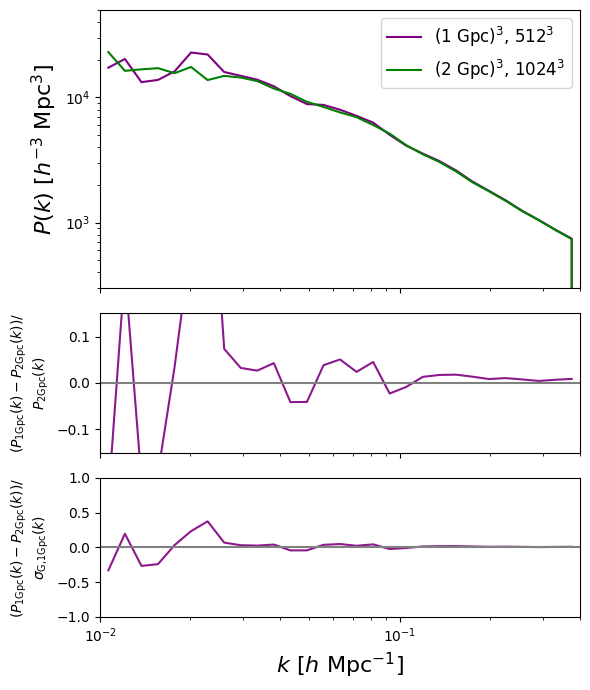

In [23]:
fns_pk = [fn_pk_hr, fn_pk_hr_2gpc]
colors = ['purple', 'green']
labels = [r'(1 Gpc)$^3$, $512^3$', 
          r'(2 Gpc)$^3$, $1024^3$']

nrows, ncols = 3, 1
fig, axarr = plt.subplots(nrows, ncols, figsize=(6,7), sharex=True, height_ratios=[2,1,1])
plt.subplots_adjust(hspace=0.01)
ax, ax1, ax2 = axarr

pks = []
errGs = []
for i in range(len(fns_pk)):
    pk_obj = np.load(fns_pk[i], allow_pickle=True).item()
    pk = pk_obj['pk']
    pks.append(pk)
    kk = pk_obj['k']
    errG = pk_obj['pk_gaussian_error']
    errGs.append(errG)
    ax.loglog(kk, pk, label=labels[i], color=colors[i])

alpha = 0.9
ax1.plot(kk, (pks[0]-pks[1])/pks[1], ls='-', alpha=alpha, color=colors[0])
ax1.axhline(0.0, color='grey')

ax2.plot(kk, (pks[0]-pks[1])/pks[0], ls='-', alpha=alpha, color=colors[0])
ax2.axhline(0.0, color='grey')

plt.xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=16)

ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=16)
ax1.set_ylabel(r'$(P_\text{1Gpc}(k)-P_\text{2Gpc}(k))/$'+'\n'+r'$P_\text{2Gpc}(k)$')
ax2.set_ylabel(r'$(P_\text{1Gpc}(k)-P_\text{2Gpc}(k))/$'+'\n'+r'$\sigma_\text{G,1Gpc}(k)$')

plt.xlim(1e-2, 0.4)

ax.set_ylim(3e2, 5e4)
ax1.set_ylim(-0.15, 0.15)
ax2.set_ylim(-1, 1)

ax.legend(fontsize=12)

mpl.pyplot.tight_layout()
mpl.pyplot.show()